# Introducción (5 min)

**Google Play Store** es una tienda de aplicaciones en línea operada por Google para dispositivos Android. Ofrece una amplia gama de aplicaciones, juegos, libros, películas, series y música para descargar o comprar. Los usuarios pueden buscar y descargar aplicaciones a través de la tienda, y los desarrolladores pueden publicar y vender sus aplicaciones a través de ella. La Google Play Store también ofrece funciones de seguridad para proteger a los usuarios contra aplicaciones maliciosas. En general, la Google Play Store es una plataforma esencial para los usuarios de dispositivos Android que desean descargar y utilizar aplicaciones en sus dispositivos.

**Contexto empresarial**: Soy un científico de datos trabajando en un proyecto de freelance para una empresa que requiere cierta información acerca de apps que se ofertan en la tienda de aplicaciones de Google (Playstore), esto con el motivo de generar hallazgos tales como que tipo de aplicaciones tienen mayor número de descargas, mejores calificaciones, mayor número de reseñas, todo esto con la hipotesis que la empresa debería lanzar una app sobre educación ya que ven potencial en ese nicho

**Problema Empresarial**: De parte del departamento de marketing se me ha planteado las siguientes preguntas:
> - Que categoría de apps cuenta con mayor número de apps?
> - ¿Qué categoría de apps cuenta con mejor calificación?

**Contexto Analítico**: Google ha dejado este Dataset abierto al público general bajo una licencia Creavtive Commons con el fin de que se usen sus datos para un bien común.

El dataset incluye datos tales como Califiaciones, número de revisiones, género de las apps, su número de descargas. A continuación se resolverá la pregunta planteada anteriormente por el equipo de marketing así como se averiguará mayor información descrita posteriormente

El caso está estructurado de la siguiente manera: (1) Se realizará un análisis general de los datos para encontrar tendencias evidentes, (2) se indagará con mayor profundidad eventos relevantes de las tendencias generales, (3) Se responderá la pregunta planteada anteriormente así como se complementará la respuesta para soluciones alternativas o dar un enfoque completamente nuevo

El propósito de este análisis es clasificar las categorias de apps que tengan mayor impacto en la playstore, de esta manera en el futuro hacer una prediccion sobre que app y de que género utilizar para invertir en anuncios a través de una agencia de marketing

#### Hipótesis

Tengo la hipótesis que las apps con mayor numero de apps en la playstore estarán en Juegos u Organización / Productividad, así como las que tendrán mejores valoraciones serán redes sociales y apps de streaming (spotify, facebook, netflix)

Primero se importan las librerias

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

Previsualización del dataset para ver que columnas y tipos de datos contiene

In [26]:
playstore = pd.read_csv('/workspaces/codespaces-jupyter/data/googleplaystore.csv')

playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Como podemos observar, tenemos variables numéricas interesantes tales como la valoración, reseñas y descargas.

Sin embargo tambien contamos con una variable 'Categoría' la cual a pesar de no estar en formato numérico es de gran importancia, ya que con ella podemos encontrar información tal como: 
> - Cantidad de apps para una categoria

Imprimo unicamente las categorias para tener una idea de cuales son

In [27]:
categorias_series = playstore['Category'].value_counts()
categorias_df = categorias_series.to_frame()
categorias = np.array([categorias_df.index[:]])

flat_categorias = categorias.flatten() #Ya que el array estaba en 2d y al momento de plotear no las leía
print(flat_categorias)

['FAMILY' 'GAME' 'TOOLS' 'MEDICAL' 'BUSINESS' 'PRODUCTIVITY'
 'PERSONALIZATION' 'COMMUNICATION' 'SPORTS' 'LIFESTYLE' 'FINANCE'
 'HEALTH_AND_FITNESS' 'PHOTOGRAPHY' 'SOCIAL' 'NEWS_AND_MAGAZINES'
 'SHOPPING' 'TRAVEL_AND_LOCAL' 'DATING' 'BOOKS_AND_REFERENCE'
 'VIDEO_PLAYERS' 'EDUCATION' 'ENTERTAINMENT' 'MAPS_AND_NAVIGATION'
 'FOOD_AND_DRINK' 'HOUSE_AND_HOME' 'LIBRARIES_AND_DEMO'
 'AUTO_AND_VEHICLES' 'WEATHER' 'ART_AND_DESIGN' 'EVENTS' 'PARENTING'
 'COMICS' 'BEAUTY' '1.9']


Ya que contamos con todas las catégorias ahora usaremos unicamente el top 10 para realizar la visualización

In [28]:
top_10_categorias = flat_categorias[:10]

In [29]:
top_10_df = playstore.where(
              (playstore['Category'] == 'FAMILY')
            | ((playstore['Category'] == 'GAME'))
            | ((playstore['Category'] == 'TOOLS'))
            | ((playstore['Category'] == 'MEDICAL'))
            | ((playstore['Category'] == 'BUSINESS'))
            | ((playstore['Category'] == 'PRODUCTIVITY'))
            | ((playstore['Category'] == 'PERSONALIZATION'))
            | ((playstore['Category'] == 'COMMUNICATION'))
            | ((playstore['Category'] == 'SPORTS'))
            | ((playstore['Category'] == 'LIFESTYLE')))

            # Intenté hacer un subset con el array del top 10 pero me marcaba error
            # Perdón por la barbaridad que acabo de hacer, investigaré como cambiarlo :(

print(top_10_df['Category'].value_counts())

FAMILY             1972
GAME               1144
TOOLS               843
MEDICAL             463
BUSINESS            460
PRODUCTIVITY        424
PERSONALIZATION     392
COMMUNICATION       387
SPORTS              384
LIFESTYLE           382
Name: Category, dtype: int64


([<matplotlib.patches.Wedge at 0x7f0c80610d30>,
 [Text(0.6800769817338119, 0.8645781045780818, 'FAMILY'),
  Text(-0.7596896423866757, 0.7955323043411908, 'GAME'),
  Text(-1.0942021223949632, -0.11279058181585029, 'TOOLS'),
  Text(-0.8401940380106026, -0.7099816747574816, 'MEDICAL'),
  Text(-0.47444594129788, -0.9924218099104678, 'BUSINESS'),
  Text(-0.04462844001870966, -1.0990943100305346, 'PRODUCTIVITY'),
  Text(0.36019372528241156, -1.0393558006126578, 'PERSONALIZATION'),
  Text(0.7008866021286072, -0.8477959488913683, 'COMMUNICATION'),
  Text(0.9510689114684266, -0.5526915284661618, 'SPORTS'),
  Text(1.083166673138151, -0.1917027861112871, 'LIFESTYLE')])

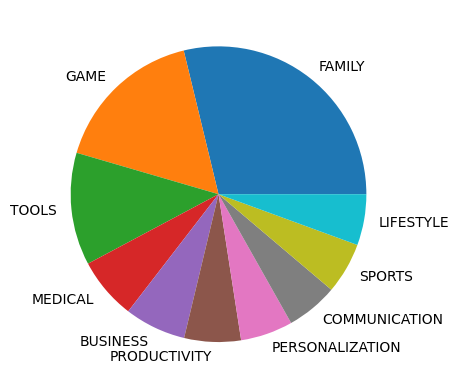

In [30]:
plt.pie(top_10_df['Category'].value_counts(), labels=top_10_categorias)

Se puede observar que La categoria de familia es mucho mayor a cualquier otra en la playstore en cuaestion de apps disponibles, mientras que educación ni siquiera alcanza a estar en el top 10

In [31]:
family = playstore[playstore['Category'] == 'FAMILY']
family_genres = family['Genres'].value_counts()
df_family_genres = family_genres.to_frame()
fam_gen = np.array([df_family_genres.index[:]])

flat_gen_fam = fam_gen.flatten() #Ya que el array estaba en 2d y al momento de plotear no las leía

top_familias = flat_gen_fam[:7]

print(top_familias)

['Entertainment' 'Education' 'Simulation' 'Casual' 'Puzzle' 'Role Playing'
 'Strategy']


In [32]:
top_familia = family.where(
              (family['Genres'] == 'Entertainment')
            | ((family['Genres'] == 'Education'))
            | ((family['Genres'] == 'Simulation'))
            | ((family['Genres'] == 'Casual'))
            | ((family['Genres'] == 'Puzzle'))
            | ((family['Genres'] == 'Role Playing'))
            | ((family['Genres'] == 'Strategy')))

            # Únicamente se tomaron 7 ya que las últimas tres categorias "eduaction;education"
            # se repetía

([<matplotlib.patches.Wedge at 0x7f0c80476170>,
 [Text(0.5870240697172322, 0.9302702519013591, 'Entertainment'),
  Text(-1.063977214938007, 0.2791997243780206, 'Education'),
  Text(-0.590869488719249, -0.9278325534818519, 'Simulation'),
  Text(0.14301460961881776, -1.090663477629822, 'Casual'),
  Text(0.6564686559148862, -0.8826374702001399, 'Puzzle'),
  Text(0.9457251700029142, -0.5617863498012026, 'Role Playing'),
  Text(1.0838115003743556, -0.18802295513125147, 'Strategy')])

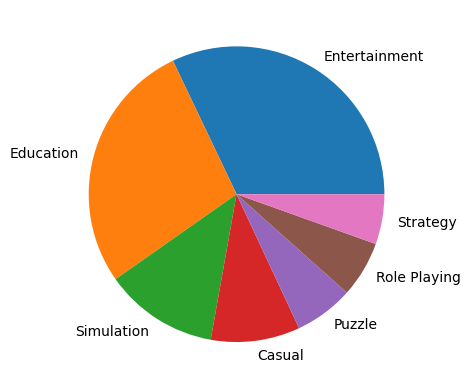

In [33]:
plt.pie(x = top_familia['Genres'].value_counts(), labels=top_familias)

Ya que familia ocupa gran parte de la playstore se puede observar que entretenimiento, educación y simulación son las categorias de apps dentro del género de familia que más apps tienen

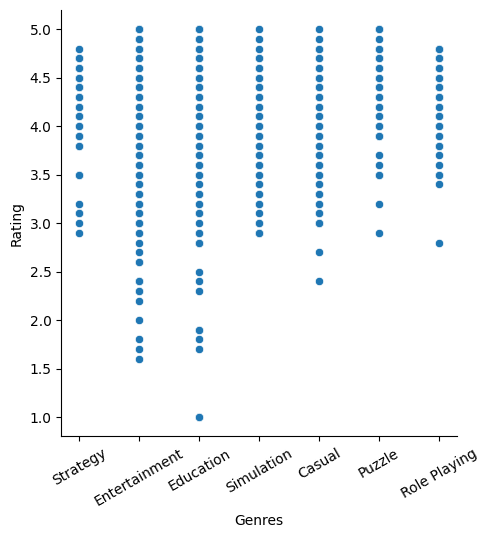

In [34]:
a = sns.relplot(data=top_familia, x="Genres", y="Rating")

a.set_xticklabels(rotation = 30)

Con esta visualización podemos observar que los únicos géneros que no llegan con calificaciones de 5 estrellas son estrategia y role playing, sin embager, tambien podemos observar que educación cuenta con un gran rango de valores de valoraciones así como entretenimiento, esto es evidente ya que son de los géneros con el mayot número de apps dentro de la categoría "Familia

Se presentó la información al equipo por lo que se solicití únicamente la cantidad de valoraciones y su calificación para las categorías con mayores calificaciones del género "GAME"

In [35]:
game = playstore[playstore['Category'] == 'GAME'].sort_values('Rating', ascending=False)

In [36]:
print(game['Genres'].value_counts())


Action                           365
Arcade                           220
Racing                            98
Adventure                         75
Card                              48
Casual                            45
Board                             44
Puzzle                            42
Casino                            39
Trivia                            38
Word                              29
Strategy                          24
Music                             22
Role Playing                      16
Sports                            14
Simulation                        11
Adventure;Action & Adventure       5
Action;Action & Adventure          3
Simulation;Action & Adventure      1
Casual;Action & Adventure          1
Simulation;Education               1
Casual;Brain Games                 1
Casual;Pretend Play                1
Casual;Creativity                  1
Name: Genres, dtype: int64


In [37]:
game_top_categorias = game.where(
              (game['Genres'] == 'Action')
            | ((game['Genres'] == 'Arcade'))
            | ((game['Genres'] == 'Racing'))
            | ((game['Genres'] == 'Adventure'))
            | ((game['Genres'] == 'Card'))
            | ((game['Genres'] == 'Casual'))
            | ((game['Genres'] == 'Board')))

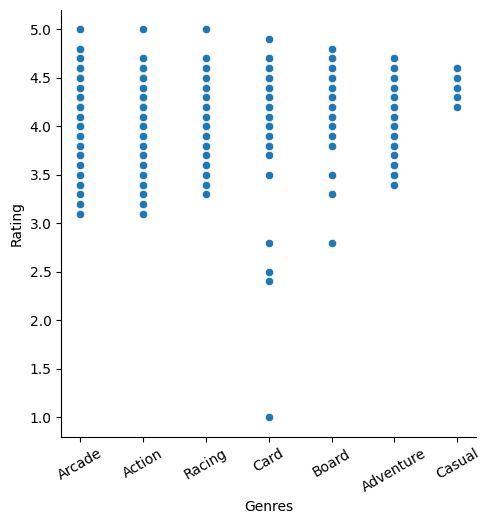

In [38]:
b = sns.relplot(data=game_top_categorias, x="Genres", y="Rating")

b.set_xticklabels (rotation = 30)

Con las visualizaciones el equipo se da cuenta que se me ha solicitado unicamente las apps con mayor número de apps dentro de un género o categoría, sin embargo, es de suma importancia conocer las que mejores valoraciones tienen en general

In [39]:
# Sacaré el porcentaje de apps que tienen mejor calificacion, es decir mayor a cuatro estrellas, respecto
# al número total de apps en general de una categoría

best_ratings = playstore[playstore['Rating'] >= 4]
best = best_ratings['Category'].value_counts()

In [40]:
quite_best = playstore['Category'].value_counts()
percentage = (best * 100) / quite_best

print(percentage.sort_values(ascending= False))

1.9                    100.000000
EDUCATION               95.512821
ART_AND_DESIGN          84.615385
GAME                    82.867133
SHOPPING                79.615385
PHOTOGRAPHY             78.805970
SOCIAL                  75.932203
HEALTH_AND_FITNESS      73.607038
ENTERTAINMENT           72.483221
WEATHER                 71.951220
PERSONALIZATION         71.938776
COMMUNICATION           69.250646
SPORTS                  69.010417
PRODUCTIVITY            68.632075
PARENTING               68.333333
FAMILY                  67.900609
FINANCE                 67.213115
HOUSE_AND_HOME          67.045455
COMICS                  66.666667
BEAUTY                  66.037736
EVENTS                  65.625000
AUTO_AND_VEHICLES       64.705882
FOOD_AND_DRINK          64.566929
BOOKS_AND_REFERENCE     64.502165
TRAVEL_AND_LOCAL        63.953488
MAPS_AND_NAVIGATION     61.313869
NEWS_AND_MAGAZINES      61.130742
VIDEO_PLAYERS           60.000000
TOOLS                   59.905101
LIBRARIES_AND_

Pdemos observar que la mayoria de apps con mejor calificacion en general de una categoria e encuentran en educación, artes y juegos  por lo que el equipo de marketing quiere saber a que se debe esto

In [41]:
education = playstore[playstore['Category'] == 'EDUCATION'].sort_values('Reviews', ascending = False)
education.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
757,Udemy - Online Courses,EDUCATION,4.5,99020,18M,"1,000,000+",Free,0,Everyone,Education,"August 2, 2018",5.0.4,5.0 and up
741,Udemy - Online Courses,EDUCATION,4.5,99020,18M,"1,000,000+",Free,0,Everyone,Education,"August 2, 2018",5.0.4,5.0 and up
787,Udemy - Online Courses,EDUCATION,4.5,99020,18M,"1,000,000+",Free,0,Everyone,Education,"August 2, 2018",5.0.4,5.0 and up
731,English words application mikan,EDUCATION,4.7,9888,Varies with device,"500,000+",Free,0,Everyone,Education,"July 30, 2018",Varies with device,4.1 and up
705,Princess Coloring Book,EDUCATION,4.5,9770,39M,"5,000,000+",Free,0,Everyone,Education;Creativity,"February 25, 2018",1.2.8,4.0 and up


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Education'),
  Text(1, 0, 'Education;Creativity'),
  Text(2, 0, 'Education;Action & Adventure'),
  Text(3, 0, 'Education;Education'),
  Text(4, 0, 'Education;Pretend Play'),
  Text(5, 0, 'Education;Brain Games'),
  Text(6, 0, 'Education;Music & Video')])

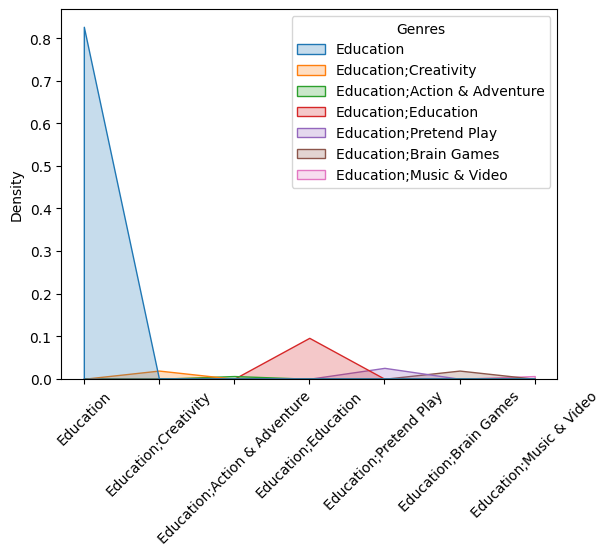

In [42]:
d = sns.histplot(data = education, x = 'Genres', hue = 'Genres', element= 'poly', stat = 'density')
d.set(xlabel=None)
plt.xticks(rotation=45)

En este caso podemos observar un dato atípico el cual es "Educación", el cual sesga el gráfico

In [43]:
without_education = education[education['Genres'] != 'Education']

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Education;Creativity'),
  Text(1, 0, 'Education;Action & Adventure'),
  Text(2, 0, 'Education;Education'),
  Text(3, 0, 'Education;Pretend Play'),
  Text(4, 0, 'Education;Brain Games'),
  Text(5, 0, 'Education;Music & Video')])

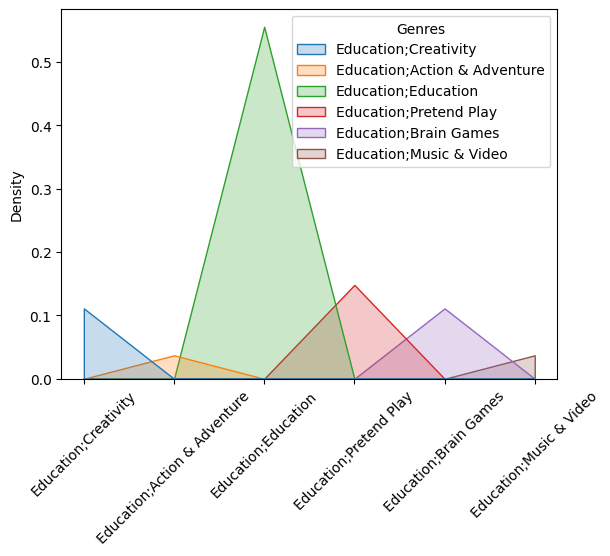

In [44]:
d = sns.histplot(data = without_education, x = 'Genres', hue = 'Genres', element= 'poly', stat = 'density')
d.set(xlabel=None)
plt.xticks(rotation=45)

Ahora si que es más facil ver los diferentes géneros que hay, sin embargo veamos que impacto tienen en las calificaciones las apps de 'Education;Education'

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Education;Creativity'),
  Text(1, 0, 'Education;Action & Adventure'),
  Text(2, 0, 'Education;Education'),
  Text(3, 0, 'Education;Pretend Play'),
  Text(4, 0, 'Education;Brain Games'),
  Text(5, 0, 'Education;Music & Video')])

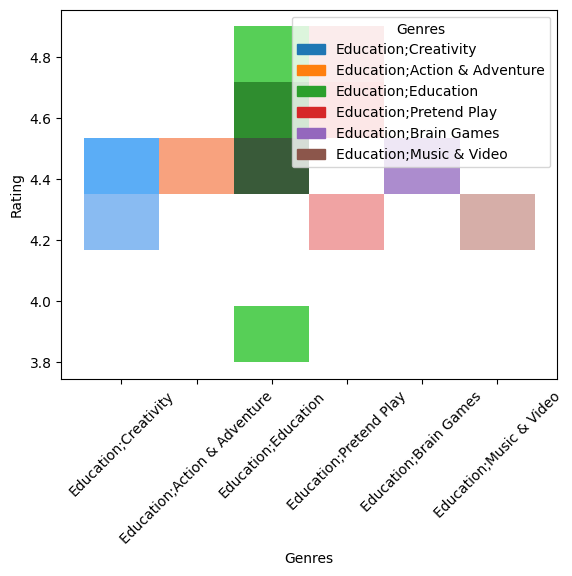

In [45]:
d = sns.histplot(data = without_education, x = 'Genres', y = 'Rating', hue = 'Genres', element= 'poly', stat = 'density')
plt.xticks(rotation=45)

Vemos que tienen un gran rango y hay una gran concentración en 4.4, pero. ¿De qué apps se tratan?

In [46]:
only_edu = education[education['Genres'] == 'Education;Education'].value_counts('App')
only_edu.head()

App
Duolingo: Learn Languages Free                        4
Rosetta Stone: Learn to Speak & Read New Languages    4
ClassDojo                                             2
ABC Preschool Free                                    1
Dinosaurs Coloring Pages                              1
dtype: int64

Vemos que las apps de idiomas ocupan el top 3 de apps de 'Education;Education', en primer lugar está Duolingo

Ahora el quipo también recuerda que en la categoría 'familia', había un género "Familia", por lo que me piden investifar cual es la diferencia entre estas apps o que impacto tienen una en comparación con la categoría de educacióon como tal